#Caso de estudio

Se desea desarrollar un modelo que permita predecir y analizar el sentimiento económico presente en los informes anuales publicados por ANALDEX entre los años 2022 y 2025, con el fin de comprender cómo cambia el tono discursivo frente al contexto del comercio exterior colombiano. Estos informes contienen datos cuantitativos y cualitativos que reflejan percepciones institucionales sobre la economía nacional e internacional.

* Año del informe: Año al que pertenece cada documento (2022, 2023, 2024 y 2025).

* Polaridad del sentimiento: Clasificación del sentimiento general como positivo, negativo o neutro.

* Categoría PANAS-tDL: Nivel de sentimiento con base en escalas como Amenaza, Pesimismo, Indiferente, Optimismo, Confianza, entre otras.

* Palabras clave: Términos relevantes que contribuyen al sentimiento dominante.

* Temas principales: Ejes temáticos vinculados a comercio exterior, estabilidad económica, proyecciones y entorno internacional.

* Evento/contexto económico asociado: Situaciones reportadas que pueden justificar el cambio en la percepción económica cada año.

El análisis considera que el lenguaje institucional puede variar según factores como recuperación económica, transición energética, transformación digital y cambios en la economía global, lo cual influye directamente en el tono del sentimiento identificado. Además, se requiere traducir los informes al idioma inglés para una mayor precisión al utilizar librerías de procesamiento de lenguaje natural disponibles en la plataforma.

Las variables del modelo se relacionan directamente con las expresiones textuales utilizadas en los informes y con las condiciones económicas presentes en cada periodo evaluado.

#0. Se procede con la instalación de los paquetes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk #Natural Laguage toolkit
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt_tab') #Para hacer el proceso más eficiente

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Mounted at /content/drive


#1. Se procede con la instalación de las librerias de análisis

In [ ]:
!pip install vaderSentiment #Diccionario de trabajo
!pip install -U spacy #Es otro diccionario updated
!pip  install download es_core_news_lg #Diccionario de trabajo en español
!pip install download es_core_ewb_sm #Diccionario en ingles
!pip install translate #Traducción automatica
!pip install wordcloud #Gráficos de nube de palabras
!python -m spacy download es_core_news_lg

# Librerias de Trabajo

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
from translate import Translator
from wordcloud import wordcloud

#Analizamos Polaridades
sia=SentimentIntensityAnalyzer()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.3 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement es_core_news_lg (from versions: none)
ERROR: No matching distribution found for es_core_news_lg
  Using cached download-0.3.5-py3-none-any.whl.metadata (3.8 kB)
ERROR: Could not find a version that satisfies the requirement es_core_ewb_sm (from versions: none)
ERROR: No matching distribution found for es_core_ewb_sm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#2. Analisis de Sentimientos ANALDEX 2022

In [ ]:
import nltk # Natural Laguage toolkit
from nltk.tokenize import word_tokenize, sent_tokenize

nxl2022= '/content/drive/MyDrive/InformeANALDEX_2022_EN.txt'
nxl2022=open(nxl2022, 'r')
texto2022=nxl2022.read()

columnas = ["Amenenaza","Pesimismo","Instabolidad","Escepticismo", "Indiferente", "Neutral","Favorable","Optimismo","Conviccion","Consolidad","Confianza"]
pol=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])

tks2022=sent_tokenize(texto2022)
nd=np.zeros((11,1)) #Numero de frases por sentimiento
for sent in tks2022: #Mostrar frase por frase
  print(sent)
  score2022=sia.polarity_scores(sent)
  print(score2022) #Se muestra la polaridad de cada frase
  print(score2022['compound']) #Esta es la polaridad consolidada
  cat2022=np.abs(pol-score2022['compound'])
  catn2022=np.argmin(cat2022) #Categoria Numerica
  print("La categoria a la que pertenece una frase es:",columnas[catn2022])
  nd[catn2022]=nd[catn2022]+1 #Sumo una unidad a cada categoria - Se identifica una frase o sentimiento

nd[5]=(nd[4]+nd[6])/2 #Para corregir los neutrales
df2022=pd.DataFrame((nd.transpose())) #Mostrar resultados - Data Frame
df2022.columns=columnas
display(df2022)

Detailed Report on Colombia's Foreign Trade in 2022 (Refined Version)

1.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
La categoria a la que pertenece una frase es: Neutral
Introduction
The year 2022 marked a crucial period for Colombia's economic recovery following the effects of the COVID-19 pandemic.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
La categoria a la que pertenece una frase es: Neutral
In an international context characterized by strong inflationary pressures, geopolitical conflicts, supply chain disruptions, and fluctuating commodity prices, Colombian foreign trade played a decisive role in economic recovery.
{'neg': 0.198, 'neu': 0.596, 'pos': 0.206, 'compound': 0.0772}
0.0772
La categoria a la que pertenece una frase es: Neutral
During this year, the country experienced significant expansion in its exports, especially in the mining and energy sector, driven by high international oil and coal prices.
{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'com

,Amenenaza,Pesimismo,Instabolidad,Escepticismo,Indiferente,Neutral,Favorable,Optimismo,Conviccion,Consolidad,Confianza
0,0.0,1.0,0.0,1.0,2.0,2.5,3.0,6.0,5.0,2.0,0.0


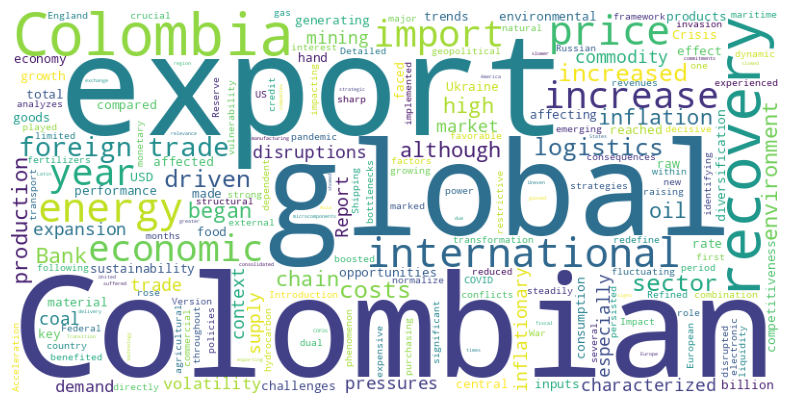

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud2022=WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis"
).generate(texto2022)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud2022)
plt.axis("off")
plt.show()

#4. Analisis de Sentimientos ANALDEX 2023

In [ ]:
import nltk # Natural Laguage toolkit
from nltk.tokenize import word_tokenize, sent_tokenize

nxl2023= '/content/drive/MyDrive/InformeANALDEX_2023_EN.txt'
nxl2023=open(nxl2023, 'r')
texto2023=nxl2023.read()

columnas = ["Amenenaza","Pesimismo","Instabolidad","Escepticismo", "Indiferente", "Neutral","Favorable","Optimismo","Conviccion","Consolidad","Confianza"]
pol=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])

tks2023=sent_tokenize(texto2023)
nd=np.zeros((11,1)) #Numero de frases por sentimiento
for sent in tks2023: #Mostrar frase por frase
  print(sent)
  score2023=sia.polarity_scores(sent)
  print(score2023) #Se muestra la polaridad de cada frase
  print(score2023['compound']) #Esta es la polaridad consolidada
  cat2023=np.abs(pol-score2023['compound'])
  catn2023=np.argmin(cat2023) #Categoria Numerica
  print("La categoria a la que pertenece una frase es:",columnas[catn2023])
  nd[catn2023]=nd[catn2023]+1 #Sumo una unidad a cada categoria - Se identifica una frase o sentimiento

nd[5]=(nd[4]+nd[6])/2 #Para corregir los neutrales
df2023=pd.DataFrame((nd.transpose())) #Mostrar resultados - Data Frame
df2023.columns=columnas
display(df2023)

Detailed Report on Colombia's Foreign Trade in 2023 (Refined Version)

1.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
La categoria a la que pertenece una frase es: Neutral
Introduction
The year 2023 represented a turning point for Colombian foreign trade, characterized by a challenging global economic environment and a structural reconfiguration of international trade relations.
{'neg': 0.0, 'neu': 0.942, 'pos': 0.058, 'compound': 0.1531}
0.1531
La categoria a la que pertenece una frase es: Favorable
Despite the persistent effects of the COVID-19 pandemic and tensions arising from geopolitical conflicts, particularly the war in Ukraine and global energy instability, Colombia managed to maintain a relatively stable performance in its exports and imports, showing signs of resilience and productive adaptation.
{'neg': 0.183, 'neu': 0.734, 'pos': 0.083, 'compound': -0.7334}
-0.7334
La categoria a la que pertenece una frase es: Pesimismo
Foreign trade consolidated itself as on

,Amenenaza,Pesimismo,Instabolidad,Escepticismo,Indiferente,Neutral,Favorable,Optimismo,Conviccion,Consolidad,Confianza
0,0.0,2.0,0.0,0.0,2.0,3.5,5.0,2.0,7.0,1.0,0.0


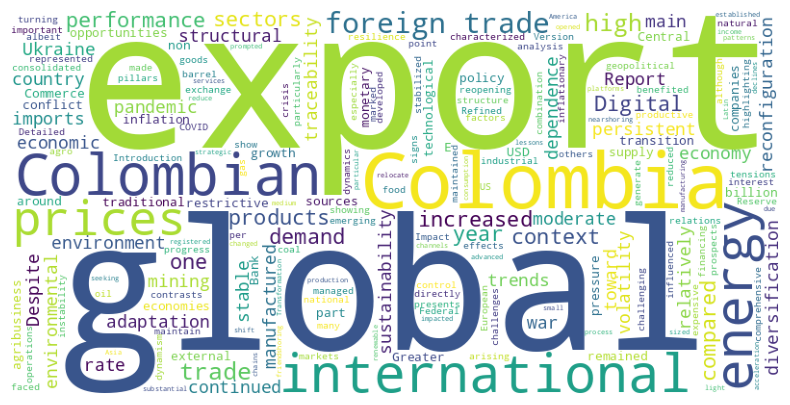

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud2023=WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis"
).generate(texto2023)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud2023)
plt.axis("off")
plt.show()

#5. Analisis de Sentimientos ANALDEX 2024

In [ ]:
import nltk # Natural Laguage toolkit
from nltk.tokenize import word_tokenize, sent_tokenize

nxl2024= '/content/drive/MyDrive/InformeANALDEX_2024_EN.txt'
nxl2024=open(nxl2024, 'r')
texto2024=nxl2024.read()

columnas = ["Amenenaza","Pesimismo","Instabolidad","Escepticismo", "Indiferente", "Neutral","Favorable","Optimismo","Conviccion","Consolidad","Confianza"]
pol=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])

tks2024=sent_tokenize(texto2024)
nd=np.zeros((11,1)) #Numero de frases por sentimiento
for sent in tks2024: #Mostrar frase por frase
  print(sent)
  score2024=sia.polarity_scores(sent)
  print(score2024) #Se muestra la polaridad de cada frase
  print(score2024['compound']) #Esta es la polaridad consolidada
  cat2024=np.abs(pol-score2024['compound'])
  catn2024=np.argmin(cat2024) #Categoria Numerica
  print("La categoria a la que pertenece una frase es:",columnas[catn2024])
  nd[catn2024]=nd[catn2024]+1 #Sumo una unidad a cada categoria - Se identifica una frase o sentimiento

nd[5]=(nd[4]+nd[6])/2 #Para corregir los neutrales
df2024=pd.DataFrame((nd.transpose())) #Mostrar resultados - Data Frame
df2024.columns=columnas
display(df2024)

Detailed Report on Colombia's Foreign Trade in 2024

1.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
La categoria a la que pertenece una frase es: Neutral
Introduction
The year 2024 represented a period of consolidation and adjustments in Colombian foreign trade, amid an international landscape that continued to be complex and changing.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
La categoria a la que pertenece una frase es: Neutral
After years of post-pandemic recovery and the persistent effects of global inflation and geopolitical conflicts, Colombia faced an environment characterized by the global economic slowdown, the energy transition, the accelerated digitalization of trade, and the search for sustainability in production chains.
{'neg': 0.059, 'neu': 0.892, 'pos': 0.048, 'compound': -0.128}
-0.128
La categoria a la que pertenece una frase es: Indiferente
Colombian foreign trade showed signs of moderation in its growth compared to 2022 and 2023.
{'neg'

,Amenenaza,Pesimismo,Instabolidad,Escepticismo,Indiferente,Neutral,Favorable,Optimismo,Conviccion,Consolidad,Confianza
0,0.0,1.0,0.0,1.0,3.0,2.0,1.0,6.0,5.0,3.0,0.0


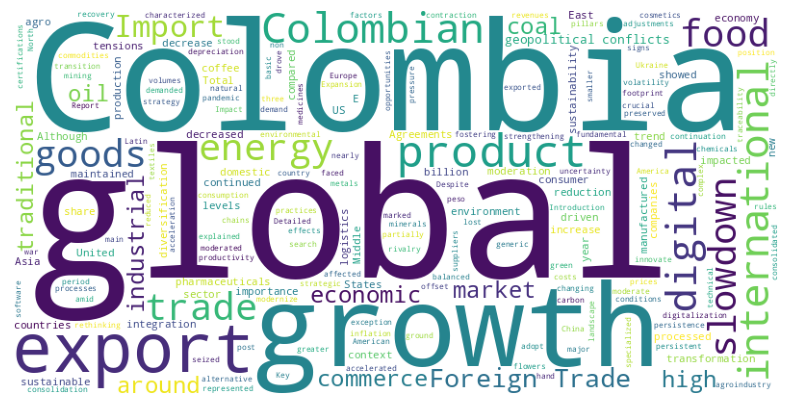

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud2024=WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis"
).generate(texto2024)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud2024)
plt.axis("off")
plt.show()

#6. Analisis de Sentimientos ANALDEX 2025

In [ ]:
import nltk # Natural Laguage toolkit
from nltk.tokenize import word_tokenize, sent_tokenize

nxl2025= '/content/drive/MyDrive/InformeANALDEX_2025_EN.txt'
nxl2025=open(nxl2025, 'r')
texto2025=nxl2025.read()

columnas = ["Amenenaza","Pesimismo","Instabolidad","Escepticismo", "Indiferente", "Neutral","Favorable","Optimismo","Conviccion","Consolidad","Confianza"]
pol=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])

tks2025=sent_tokenize(texto2025)
nd=np.zeros((11,1)) #Numero de frases por sentimiento
for sent in tks2025: #Mostrar frase por frase
  print(sent)
  score2025=sia.polarity_scores(sent)
  print(score2025) #Se muestra la polaridad de cada frase
  print(score2025['compound']) #Esta es la polaridad consolidada
  cat2025=np.abs(pol-score2025['compound'])
  catn2025=np.argmin(cat2025) #Categoria Numerica
  print("La categoria a la que pertenece una frase es:",columnas[catn2025])
  nd[catn2025]=nd[catn2025]+1 #Sumo una unidad a cada categoria - Se identifica una frase o sentimiento

nd[5]=(nd[4]+nd[6])/2 #Para corregir los neutrales
df2025=pd.DataFrame((nd.transpose())) #Mostrar resultados - Data Frame
df2025.columns=columnas
display(df2025)


Detailed Report on Colombia's Foreign Trade in 2025

1.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
La categoria a la que pertenece una frase es: Neutral
Introduction
The year 2025 consolidated a structural change in the dynamics of Colombian foreign trade, marked by the stabilization of international markets, the consolidation of the digital economy, and sustained progress toward the energy transition.
{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.7184}
0.7184
La categoria a la que pertenece una frase es: Consolidad
After several years of volatility stemming from the pandemic, global inflation, and geopolitical conflicts, Colombia experienced a more predictable environment, although not without challenges.
{'neg': 0.101, 'neu': 0.854, 'pos': 0.045, 'compound': -0.3476}
-0.3476
La categoria a la que pertenece una frase es: Escepticismo
In this scenario, Colombian exports showed a significant recovery: the relative weight of traditional products such as oil, coal

,Amenenaza,Pesimismo,Instabolidad,Escepticismo,Indiferente,Neutral,Favorable,Optimismo,Conviccion,Consolidad,Confianza
0,0.0,0.0,2.0,2.0,3.0,6.0,9.0,14.0,15.0,11.0,1.0


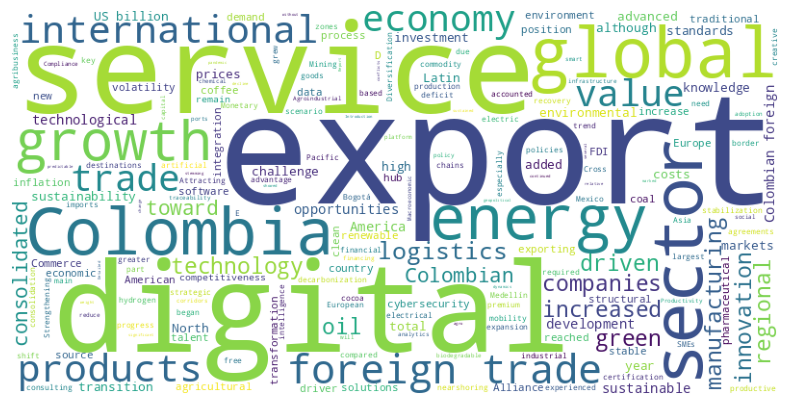

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud2025=WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis"
).generate(texto2025)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud2025)
plt.axis("off")
plt.show()

#7. Como mostrar la nube de palabras general

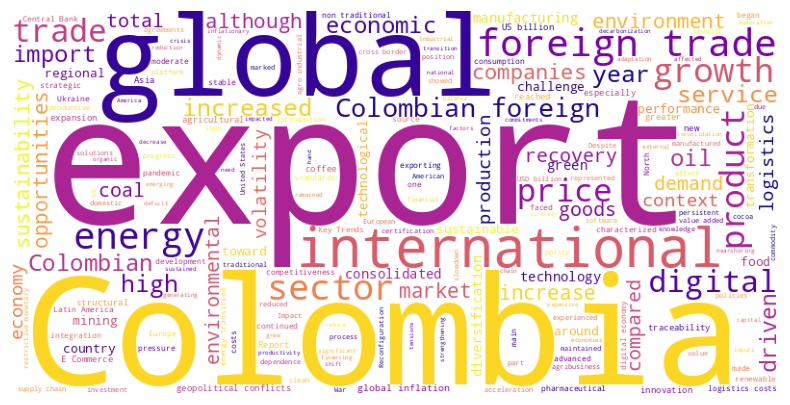

In [ ]:
# Read the text from the original files
texto_2022 = open('/content/drive/MyDrive/InformeANALDEX_2022_EN.txt', 'r').read()
texto_2023 = open('/content/drive/MyDrive/InformeANALDEX_2023_EN.txt', 'r').read()
texto_2024 = open('/content/drive/MyDrive/InformeANALDEX_2024_EN.txt', 'r').read()
texto_2025 = open('/content/drive/MyDrive/InformeANALDEX_2025_EN.txt', 'r').read()

# Concatenate the text from all years
texto_completo = texto_2022 + texto_2023 + texto_2024 + texto_2025

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="plasma"
).generate(texto_completo)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#Análisis de resultados

El análisis de resultados del tono discursivo en los informes de ANALDEX (2022–2025) muestra una correlación directa entre el sentimiento predominante y el éxito percibido en la diversificación de la matriz exportadora, más que en el desempeño total de las exportaciones. A lo largo de los cuatro años, las categorías de sentimiento negativo o de cautela (Amenaza, Pesimismo, Inestabilidad, Escepticismo e Indiferente) se mantuvieron en niveles marginales (entre 0.0% y 2.0%), lo que indica una narrativa institucional de resiliencia y estabilidad.

El periodo inicia en **2022** con la categoría oficial catalogada como **Neutral**. Pese a que el sentimiento numéricamente más alto fue **Optimismo (6.0%)**, seguido de cerca por Convicción (5.0%), esta neutralidad refleja el contexto macroeconómico complejo. Las exportaciones totales crecieron un 38% alcanzando los USD 57 mil millones, impulsadas por el *boom* de precios de materias primas. Sin embargo, el discurso cauteloso se justifica por las fuertes presiones inflacionarias globales y las políticas monetarias restrictivas.

El sentimiento dominante experimentó un cambio estructural en **2023**, cuando la categoría oficial y numérica más alta fue **Convicción (7.0%)**. Este fuerte convencimiento se mantuvo a pesar de que las exportaciones totales experimentaron una ligera disminución (-3.5%), debido a la caída de los precios de los combustibles fósiles. La alta **Convicción** se explica por el avance en la diversificación, ya que el peso de los productos no tradicionales se expandió significativamente, representando el 43% del total de las exportaciones.

La misma tendencia se sostuvo en **2024**, manteniendo la **Convicción** como la categoría dominante con un 7.0%. Este sentimiento persistió a pesar de que el contexto macroeconómico global fue de **desaceleración** y las exportaciones totales se moderaron nuevamente (disminuyendo cerca de un 4% respecto a 2023). La perseverancia de la Convicción demuestra que ANALDEX centró su narrativa en la *consolidación* de la estrategia de diversificación, destacando la expansión de productos no tradicionales y la necesidad de repensar la integración internacional ante el panorama incierto.

Finalmente, en **2025**, el sentimiento oficial regresó a **Neutral**, aunque los valores numéricos de **Optimismo (6.0%)** y Convicción (5.0%) continuaron siendo altos. Este perfil positivo se correlaciona con la estabilización de los mercados internacionales y una recuperación significativa de las exportaciones (7.2% de crecimiento). El año 2025 consolidó el cambio estructural: los productos no tradicionales alcanzaron el 47% del total. El alto optimismo refleja esta transformación, mientras que la clasificación de *Neutral* indica una conciencia de los desafíos estructurales no resueltos, como la infraestructura logística insuficiente y los riesgos macroeconómicos persistentes.